<a href="https://colab.research.google.com/github/idavid80/keras/blob/main/03_Primeros_Pasos_Keras/clasificador_peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Pasamos por argumento las 10.000 palabras que más aparecen en los datos de entrenamientos, de esta forma, eliminamos palabras raras y hacemos más manejable los datos.

In [ ]:
print(train_data[0])

print('label:', train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
label: 1


In [ ]:
max([max(sequence) for sequence in train_data])

9999

Al pasar por argumetos 10.000, ninfuna palabra excedera de ese valor

In [ ]:
word_index = imdb.get_word_index() # diccionario que asigna indice de enteros a palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # diccionario que asigna palabras a indice de enteros
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # descodifica la crótica

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Los índices estan desviados a 3 porque se reservan para "relleno", "inicio secuencia" y "desconocido"

Un tensor no puede recibir lista de enteros, por lo que hay dos formas de convertirlos en tensores.

1.   Rellenar las listas para que tenga la misma longitud con la forma (muestra, indice_palabra) y utilizar una capa Embedding (utilizar la primera capa de la red con enteros que puedan ser manejados)
2.   Usar codificación one-hot en las listas
 para convertirlas en vectores binarios (0 y 1), que se podrían usar en la primera capa Dense para manejar los datos vectoriales de puntos flotantes.


In [ ]:
# Codificar la secuencia de enteros en una matriz binaria
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
  # crea una matriz de 0 con la forma (len(sequence), dimension))
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    results[i, sequence] = 1. # Pasa indices especificos de results[i] a 1
  return results

Vectorizamos los datos de entrenamientos y test

In [ ]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


Hacemos lo mismo con las etiquetas

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Una vez tenemos los datos listos, procedemos a crear la red neuronal. Tenemos que los datos de entrada son vectores y las etiquetas escalares (0 y 1). Esta es la configuración más sencilla, bastará con una simple pila de capas completamente conectadas (Dense y activación relu)

In [ ]:
"""
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
"""
from keras import models
from keras import layers
from keras import Input # Importar Input

model = models.Sequential(
    [
        Input(shape=(10000,)), # Usar la capa Input explícitamente
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

Un esquema de esta red sería:

Entrada (texto vectorizado) --> Dense (16 unidades) --> Dense (16 unidades) --> Dense (1 unidad) --> Resultado probabilidad



In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

En este caso utilizamos:
- *binary_crossentropy* porque esperamos datos estadísticos, tenemos como salida un resultado de probabilidad (última capa tiene una activación *sigmoid*). En este caso, *binary_crossentropy* medirá la distancia entre distribución verdadera y las predicciones.
- rmsprop (Root Mean Square Propagation) es un optimizador de tasa de aprendizaje adaptativa. Esto significa que ajusta dinámicamente la tasa de aprendizaje (el tamaño del paso para modificar los pesos) de forma independiente para cada peso de la red.

In [ ]:
x_val = x_train[:10000] # conjunto de validación con los primeros 10,000 ejemplos
partial_x_train = x_train[10000:] # Contiene todos los ejemplos restantes de x_train

# Hacemos lo mismo con las etiquetas
y_val = y_train[:10000] # representa el conjunto de etiquetas o respuestas correctas (targets o outputs)
partial_y_train = y_train[10000:]

Dividimos el conjunto de datos de entrenamiento en dos subconjuntos para monitorizar el rendimiento del modelo durante el entrenamiento. Esto es crucial para:
Detectar el sobreajuste (overfitting)
Ajustar los hiperparámetros (como el número de épocas, la tasa de aprendizaje, etc.) para encontrar la configuración óptima antes de la evaluación final

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6823 - loss: 0.6269 - val_accuracy: 0.8533 - val_loss: 0.4454
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8778 - loss: 0.3970 - val_accuracy: 0.8779 - val_loss: 0.3371
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9091 - loss: 0.2815 - val_accuracy: 0.8794 - val_loss: 0.3060
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9298 - loss: 0.2179 - val_accuracy: 0.8827 - val_loss: 0.2908
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9421 - loss: 0.1852 - val_accuracy: 0.8875 - val_loss: 0.2773
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9498 - loss: 0.1561 - val_accuracy: 0.8854 - val_loss: 0.2832
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9602 - loss: 0.1341 - val_accuracy: 0.8800 - val_loss: 0.3005
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9680 - loss: 0.1083 - val_accuracy: 0.8813 - v

Entrenamos el modelo para 20 repeticionessobre odas las muestras en los tensores x_train e y_train en minilotes de 512 muestras

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

model.fit() devuleve un objeto History que es un diccionario con los datos sobre lo que ha ocurrido en el eentrenamiento. En este caso, tenemos cuatro entradas (una por métrica) que sea han monitorizado durante el entrenamiento y validación. También tenemos la exactitud del entrenamiento y la validación.

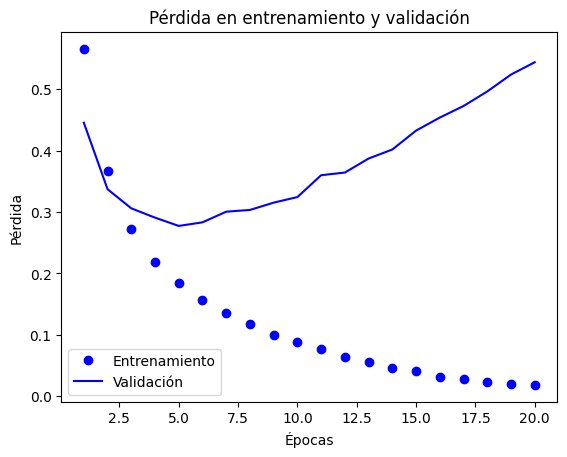

In [ ]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Entrenamiento')
plt.plot(epochs, val_loss_values, 'b', label='Validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

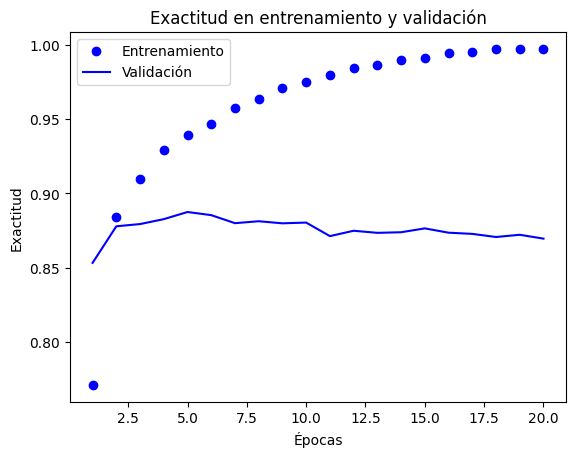

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Validación')
plt.title('Exactitud en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

plt.show()

Como se aprecia en las gráficas, la pérdida de entrenamiento se reduce con cada repetición mientras que la exactitud aumenta. Podemos ver que hay un sobre ajuste después de la tercera repetición, por lo que repetiremos el entrenamiento desde cero con 4 repeticiones.

In [ ]:
model = models.Sequential(
    [
        Input(shape=(10000,)), # Usar la capa Input explícitamente
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7262 - loss: 0.5646
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9063 - loss: 0.2880
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9242 - loss: 0.2203
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9366 - loss: 0.1833
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.2856


In [ ]:
print(results)

[0.28260481357574463, 0.8869199752807617]


Observamos que conseguimos una exactitud del 88.7%.

### Generar predicciones

Una vez entrenada la red, vamos a generar la probabilidad de que la crítica sea positiva.

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.20584358],
       [0.99913174],
       [0.86468464],
       ...,
       [0.10300232],
       [0.09144276],
       [0.67964953]], dtype=float32)

Observamos que con algunas muestras hay una confianza el 0.999%, pero con otras apenas llegan al 0.089%

In [ ]:
def review_to_vector(review, word_index, dimension=10000):
  # Convertir a minúsculas y dividir por espacios
  tokens = review.lower().split()
  # Convertir palabras a índices
  indices = [word_index.get(word, -1) for word in tokens]
  # Filtrar y sumar el offset de 3 (IMDb empieza en 3 → reservados 0,1,2)
  indices = [
      idx + 3 for idx in indices
      if idx != -1 and idx + 3 < dimension
  ]
  # Inicializar el vector a ceros
  vector = np.zeros((1, dimension))

  # Establecer a 1.0 en las posiciones de los índices encontrados
  # Los índices deben ser únicos y estar dentro del rango [0, dimension-1]
  if indices: # Asegura que la lista de índices no esté vacía
    # Usar np.unique para evitar contar la misma palabra varias veces si el modelo no lo requiere
    # En el enfoque bag-of-words *one-hot* (presencia/ausencia), solo se necesita 1.
    unique_indices = np.unique(indices)
    vector[0, unique_indices] = 1.0 # Asignación directa a todos los índices

  return vector

Ejecuta el siguiente codigo para probar el modelo. Escribe una reseña en el input y pulsa enter.

In [ ]:
new_review = input("Escribe tu reseña de película: ")

vectorized_review = review_to_vector(new_review, word_index)
prediction = model.predict(vectorized_review)

if prediction[0][0] > 0.5:
  print(f"Reseña POSITIVA (probabilidad {prediction[0][0]:.2f})")
else:
  print(f"Reseña NEGATIVA (probabilidad {1 - prediction[0][0]:.2f})")

Escribe tu reseña de película: Me ha encantado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Reseña POSITIVA (probabilidad 0.52)
